In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import scipy.stats as st
import math
from pandas_datareader import data
import statsmodels.api as sm
from IPython.display import Image

#### 1. cars(x:speed, y:dist) 데이터를 이용하여 회귀계수(절편, 기울기) 를 구하시오.  공식(b0, b1)을 이용하여 구하시요.( 회귀분석 pdf 파일 6p 공식)

#### 최소제곱 추정법(LSE : Least Square Estimation)

$$ * \text{Proof} * $$


$$y_i=\beta_0-\beta_1 x_i+\epsilon_i, \quad  \epsilon_i \sim N(0, \sigma^2) $$    

$$ \hat y_{i} =b_0-b_1 x_i \quad where \quad \hat\beta_0 = b_0, \;  \hat\beta_1 = b_1  $$

$$ Min\; SSE = \sum (y_i - \hat{y_i})^2 = \sum (y_i - (b_0-b_1 x_i))^2 $$

$$\frac{\partial{SEE}}{\partial{b_0}}=\sum{(y_i-b_0-b_1 x_i)}=0$$

$$\frac{\partial{SEE}}{\partial{b_1}}=\sum{(y_i-b_0-b_1 x_i)x_i}=0$$


$$ * \text{Normal\; equation} * $$




$$  X'Xb = \begin {pmatrix} n & \sum x_i \\ \sum x_i & \sum x_i^2 \end {pmatrix}\begin {pmatrix} b_0 \\ b_1 \end {pmatrix}=\begin {pmatrix} \sum y_i \\ \sum x_iy_i \end {pmatrix}=X'Y$$


$$
{b} = (X'X)^{-1}X'Y
$$


$$
{b} = \begin {pmatrix} {b_0} \\ {b_1} \end {pmatrix}  = {1 \over \sum(x_i - \bar x)^2} \begin {pmatrix} {1 \over n}\sum x_i^2 & - \bar{x} \\ - \bar{x} & 1 \end {pmatrix} \begin {pmatrix} \sum y_i \\ \sum x_iy_i\end {pmatrix} = {1 \over \sum(x_i -\bar{x})^2} \begin {pmatrix} \bar{y} \sum x_i^2 - \bar{x} \sum x_iyi \\ \sum x_iy_i - n \bar{x} \bar{y}\end {pmatrix}
$$





$$ * \text{Result} * $$

$$
\therefore {b_0} = \bar{y} - {b_1\bar{x}}
$$


$$
\therefore {b_1} = { \sum (x_i - \bar{x} ) (y_i - \bar{y}) \over \sum (x_i - \bar{x} )^2 }
$$

In [2]:
df = pd.read_csv( 'data/cars.csv', index_col='Unnamed: 0')
x  = df['speed']
y  = df['dist']

- way1

In [3]:
x_bar = sum(x)/len(x)
y_bar = sum(y)/len(y)

Sxy   = []
Sxx   = []

for i, j in zip(x,y):
    Sxx.append( (i-x_bar)**2 )
    Sxy.append( (i-x_bar)*(j) )
    
b_1   = sum(Sxy)/sum(Sxx)
b_0   = y_bar - b_1*x_bar
print( f'b0: {b_0}, b1: {b_1}' )

b0: -17.57909489051095, b1: 3.9324087591240873


- way2

In [4]:
b1 = ( (x - x.mean())*(y - y.mean()) ).sum() / ( (x- x.mean())**2 ).sum()
b0 = y.mean() - ( b1*x.mean() )
b0, b1

(-17.57909489051096, 3.932408759124088)

$$
{b_1} = { \sum (x_i - \bar{x} ) (y_i - \bar{y}) \over \sum (x_i - \bar{x} )^2 }= { \sum (x_i - \bar{x} )y_i \over \sum (x_i - \bar{x} )^2 } = \frac{Cov(x,y)}{Var(x)}= \frac{Corr(x,y)\sigma_y}{\sigma_x}
$$

- way3

In [5]:
def LSE( x, y ):
    b1 = np.cov(x, y)[0,1]/x.var()
    b0 = y.mean() - b1 * x.mean()
    return b0, b1
LSE( x, y )

(-17.57909489051095, 3.9324087591240873)

In [6]:
def LSE( x, y ):
    b1 = ( np.corrcoef(x,y)[0,1]*y.std() )/ x.std()
    b0 = y.mean() - b1 * x.mean()
    return b0, b1
LSE( x, y )

(-17.57909489051095, 3.9324087591240873)

- way4

In [7]:
 st.linregress( x, y ).intercept, st.linregress( x, y ).slope

(-17.579094890510937, 3.9324087591240864)

- way5

In [8]:
sm.OLS.from_formula("dist ~ speed", df).fit().params

Intercept   -17.579095
speed         3.932409
dtype: float64

- Visualization

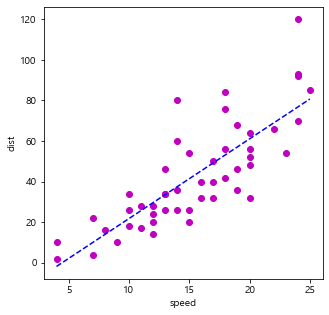

In [9]:
plt.figure(figsize=(5,5))
plt.xlabel('speed'); plt.ylabel('dist')
plt.scatter( x, y, c='m' )
lm = b_0 + b_1 *x 
plt.plot( x, lm, 'b--')
plt.show()

#### 2.  x=[1,2,3,4,5,6,7,8,9,10] ,  y=[2,4,6,8,10,12,14,16,18,20] 일때 h(x) = wx 로 하여 경사 하강 학습방법을 이용하여 w값을 구하시요.

#### Cost (MSE : Mean Square Error) 정의 =>  단, b를 고려하지 않은 경우의 Cost function
$$
cost(w) = \frac{1}{n}\sum_{i=1}^n (wx_{(i)}-y_{(i)})^2 $$ <br> $$ where \quad wx_{(i)} = true\,observation \; ,\, y_{(i)} = estimate\,of\, observation
$$

In [10]:
X = [1,2,3,4,5,6,7,8,9,10]
Y = [2,4,6,8,10,12,14,16,18,20] 

#### Cost fucntion

In [11]:
def cost( x, y, w ):
    c=0
    for i in np.arange( len(x) ):
        hx = w*x[i]
        c  = c+( hx-y[i])**2
    return c / len(x)

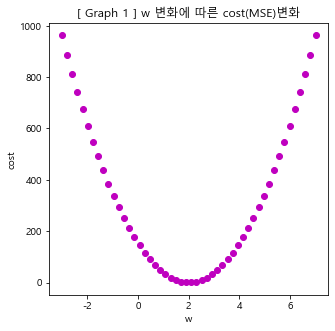

In [12]:
plt.figure(figsize=(5,5))
plt.title( '[ Graph 1 ] w 변화에 따른 cost(MSE)변화')
plt.xlabel('w'); plt.ylabel('cost')
for w in np.linspace(-3,7,50):
    c = cost( X, Y, w)
    # print( w, c)
    plt.plot( w, c, 'mo') 
plt.show()

#### 경사 하강법(Gradient descent)
- 경사 하강법(Gradient descent)은 1차 근삿값 발견용 최적화 알고리즘이다. 기본 개념은 함수의 기울기(경사)를 구하고 경사의 절댓값이 낮은 쪽으로 계속 이동시켜 극값에 이를 때까지 반복시킴.
- 경사하강법 : https://angeloyeo.github.io/2020/08/16/gradient_descent.html
- 경사하강법을 이용한 회귀분석 : https://angeloyeo.github.io/2020/08/24/linear_regression.html

$$\text{cost}(w) := \frac{1}{2n}\sum_{i=1}^n (wx_{(i)}-y_{(i)})^2 $$ <br>
\begin{align}
w_{(j+1)} := w_{(j)} - \alpha\frac{1}{n}\sum_{i=1}^n (w_{(j)}x_{(i)}-y_{(i)})x_{(i)}=  w_{(j)}- \alpha\text{cost}^\prime(w_{(j)})
, \quad \alpha = \text{Learning}\;\text{Rate} (\text{학습률}), \quad j=0,1,2,...,m
\end{align}

$$ *\text{process}* $$

$$w_{(0)} : \text{initial} \; \text{value} $$

$$ w_{(1)} := w_{(0)} - \alpha\frac{1}{n}\sum_{i=1}^n (w_{(0)}x_{(i)}-y_{(i)})x_{(i)}=  w_{(0)}- \alpha{\text{cost}^\prime(w_{(0)})} $$

$$ w_{(2)} := w_{(1)} - \alpha\frac{1}{n}\sum_{i=1}^n (w_{(1)}x_{(i)}-y_{(i)})x_{(i)}=  w_{(1)}- \alpha{\text{cost}^\prime(w_{(1)})} $$

$$ w_{(3)} := w_{(2)} - \alpha\frac{1}{n}\sum_{i=1}^n (w_{(2)}x_{(i)}-y_{(i)})x_{(i)}=  w_{(2)}- \alpha{\text{cost}^\prime(w_{(2)})} $$

$$ \vdots  \; \text{update} \; \text{until}  \; \text{converge} $$

$$ w_{(m)} := w_{(m-1)} - \alpha\frac{1}{n}\sum_{i=1}^n (w_{(m-1)}x_{(i)}-y_{(i)})x_{(i)}=  w_{(2)}- \alpha{\text{cost}^\prime(w_{(m-1)})} $$


#### 𝐿𝑒𝑎𝑟𝑛𝑖𝑛𝑔 𝑅𝑎𝑡𝑒(학습률)

In [13]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png')

In [14]:
def gradient_descent( x, y, w ):
    c = 0
    for i in range( len(x) ):
        hx = w*x[i]
        c = c + (hx-y[i])*x[i] 
    return c / len(x)

In [15]:
def show_gradient( x, y, w ):
    for iter in range(1,201,1):
        c = cost( x, y, w )
        g = gradient_descent( x, y, w )
        w = w - 0.01*g
        print( f'iteraion:{iter}, Cost:{round(c,7)}, w:{round(w,7)},g:{g}' )
    print('w:', round(w,7) )

In [16]:
show_gradient( X, Y, 3 )

iteraion:1, Cost:38.5, w:2.615,g:38.5
iteraion:2, Cost:14.5616625, w:2.378225,g:23.67750000000001
iteraion:3, Cost:5.5075848, w:2.2326084,g:14.561662500000002
iteraion:4, Cost:2.0831063, w:2.1430542,g:8.955422437499994
iteraion:5, Cost:0.7878829, w:2.0879783,g:5.507584799062491
iteraion:6, Cost:0.297997, w:2.0541067,g:3.38716465142344
iteraion:7, Cost:0.1127099, w:2.0332756,g:2.0831062606254065
iteraion:8, Cost:0.0426297, w:2.0204645,g:1.2811103502846177
iteraion:9, Cost:0.0161236, w:2.0125857,g:0.7878828654250487
iteraion:10, Cost:0.0060984, w:2.0077402,g:0.48454796223641006
iteraion:11, Cost:0.0023066, w:2.0047602,g:0.2979969967753961
iteraion:12, Cost:0.0008724, w:2.0029275,g:0.18326815301686866
iteraion:13, Cost:0.00033, w:2.0018004,g:0.1127099141053776
iteraion:14, Cost:0.0001248, w:2.0011073,g:0.06931659717480283
iteraion:15, Cost:4.72e-05, w:2.000681,g:0.04262970726250308
iteraion:16, Cost:1.79e-05, w:2.0004188,g:0.026217269966432744
iteraion:17, Cost:6.8e-06, w:2.0002576,g:0.01

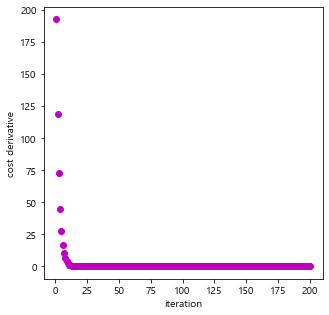

In [17]:
plt.figure(figsize=(5,5))
plt.xlabel('iteration'); plt.ylabel('cost derivative')
for iter in range(1,201,1):
    g = gradient_descent( X, Y, w )
    w = w - 0.01*g
    # print(g)
    plt.plot( iter, g, 'mo--') 
plt.show()

$  Result : \hat{h(x)}= \hat{y} = 2x $

#### 3. 삼성전자주가중 2020년 종가 표본 100개를 추출하여 2020년 종가의 평균을 신뢰도 95% 로 추정하시요.

In [18]:
samsungdf = data.get_data_yahoo('005930.KS','2017-01-01' )
df2020    = samsungdf['2020']['Close']
df2020.head(), df2020.tail()

(Date
 2020-01-02    55200.0
 2020-01-03    55500.0
 2020-01-06    55500.0
 2020-01-07    55800.0
 2020-01-08    56800.0
 Name: Close, dtype: float64,
 Date
 2020-12-23    73900.0
 2020-12-24    77800.0
 2020-12-28    78700.0
 2020-12-29    78300.0
 2020-12-30    81000.0
 Name: Close, dtype: float64)

- way1

In [19]:
np.random.seed(1)
n       = 100
sample  = np.random.choice( df2020 , n )
xbar    = sample.mean()
sigma   = sample.std()
CI      = st.norm.interval(0.95, loc=xbar, scale=sigma/math.sqrt(n)) # scale=st.sem( sample, ddof=0 )
print( f'{CI[0]} <= 모평균(m) <= {CI[1]}')
print('')
print(f'* 2020년 삼성전자 평균종가(m)에 대한 95% 신뢰구간은 {CI[0].round(2)}원 사이에서 {CI[1].round(2)}원 사이에 존재한다.')

56113.08339603988 <= 모평균(m) <= 58985.91660396012

* 2020년 삼성전자 평균종가(m)에 대한 95% 신뢰구간은 56113.08원 사이에서 58985.92원 사이에 존재한다.


- way2

In [20]:
def CI(x, z, s, n):
    L = x - z*( s/math.sqrt(n) )
    U = x + z*( s/math.sqrt(n) )
    print( ( L, U ) )
    print('신뢰구간의 길이:', round(U-L, 3) )

In [21]:
x = xbar
z = 1.96
s = sigma
n = 100
CI(x, z, s, n)

(56113.0570010627, 58985.9429989373)
신뢰구간의 길이: 2872.886


#### 4. 2020년도 삼성전자 종가 표본크기가 20인 표본 100개를 추출하여 표본평균의 평균, 표본평균의 분산, 표본평균의 편차를 구하시요.

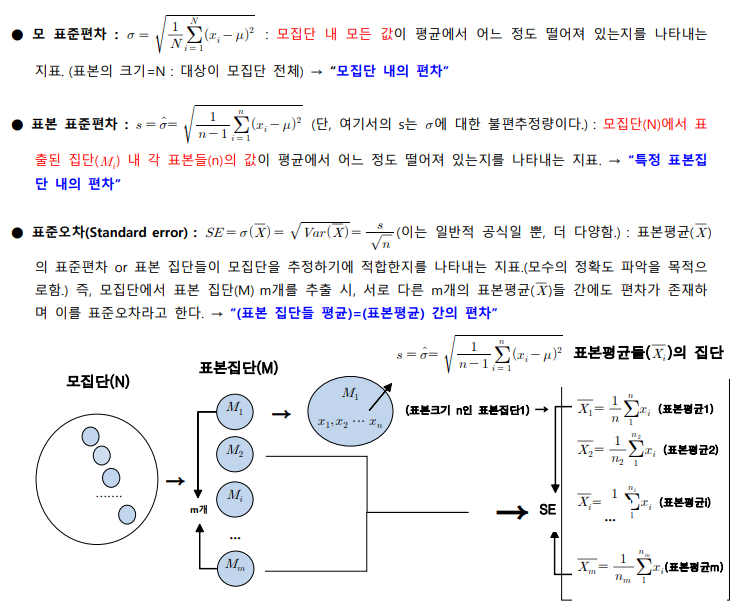

In [22]:
Image('data3/sample.png')

In [23]:
len(sample)   # from problem 3 , 표본집단(x1,x2,......x100)

100

In [24]:
np.random.seed(1)
size        = 20
nSample     = 100
xbar        = np.array( [np.random.choice( sample, size ).mean() for _ in range(nSample)] )

- 표본평균의 평균

In [25]:
xbar.mean()

57609.05

- 표본평균의 분산

In [26]:
xbar.var()

2646991.7225

- 표본평균의 표준편차(SEM : standard error of the mean) = (평균의) 표준오차 

In [27]:
sample.std()/ math.sqrt(size)

1638.7674446058536

In [28]:
xbar.std()

1626.957812145109

#### 5. 어느 회사에서 생산하는 전자제품의 평균수명을 조사하기 위하여, 표본 100개를 뽑았더니 평균은 800일이 나왔다.  그리고 과거의 자료를 분석한 결과 모표준편차(σ)는 40일이라고 한다. 이때 전자제품의 평균수명에 대한 95%의 신뢰구간을 구하시오.

In [29]:
x = 800
z = 1.96
s = 40
n = 100
CI(x, z, s, n)

(792.16, 807.84)
신뢰구간의 길이: 15.68


In [30]:
sigma = 40
xbar  = 800
N     = 100
st.norm.interval( 0.95, loc=xbar, scale=sigma/math.sqrt(N) )

(792.1601440618398, 807.8398559381602)

#### 6. 우리나라 대학생들의 월 평균용돈을 알아보기 위하여, 대학생 70명을 조사하였더니, 월 평균용돈은 13만 원이 나왔다.  그럼 모표준편차(σ)를 3만 원이라고 가정했을 때, 대학생의 월 평균용돈에 대한 99%의 신뢰구간을 구하시오.

In [31]:
x = 13
z = 2.58
s = 3
n = 70
CI(x, z, s, n)

(12.07489305637518, 13.92510694362482)
신뢰구간의 길이: 1.85


In [32]:
sigma = 3
xbar  = 13
N     = 70
st.norm.interval(0.99, loc=xbar, scale=sigma/math.sqrt(N))

(12.07638853709094, 13.92361146290906)

#### 7. y = (5x+3)^3 인경우 편미분을 이용하여 미분값 도출과정을 적으시요.

$$ * \; \text{derivative}* $$

$$ f(x,y) = (5x+3)^3 - y $$

$$ f_x(x,y) = \dfrac{\partial f}{\partial x} = 3(5x+3)^2*\dfrac{\partial}{\partial x} (5x+3)$$

$$ = 3(5x+3)^2*5$$

$$ = 15(5x+3)^2$$

$$ *\text{Chain} \; \text{rule}* $$

$${h(x)}={f(g(x))}$$

$${h^\prime(x)}={f^\prime(g(x))}{g^\prime(x)}$$

$$ {y}={(5x+3)^3} $$

$$ {f(x)}={x^3}, \quad  {g(x)}={5x+3} $$

$$ {f^\prime(x)}={3x^2}, \quad  {g^\prime(x)}={5} $$

$$ \therefore {y}={(3)(5x+3)^2(5)}={15(5x+3)^2} $$